# Tarea Semanal 2

#### Por Joaquín López Tramullas
---------------------------------------------------------------

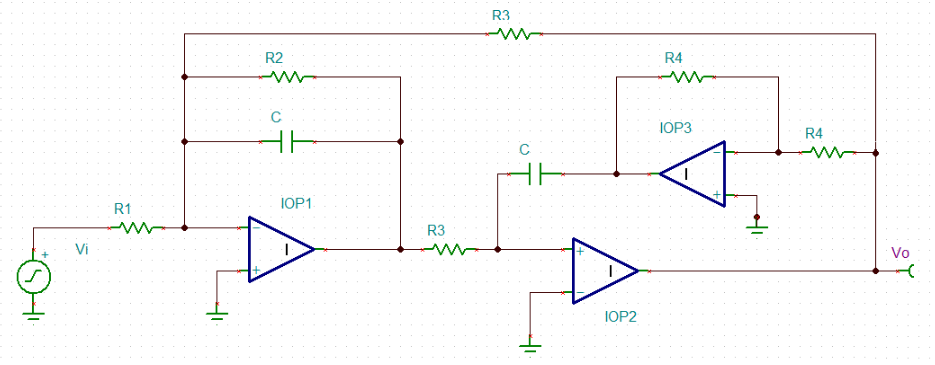

## FILTRO PASA-BAJOS

Trabajamos con la siguiente transferencia, obtenida analíticamente:

\begin{equation}
T(s) = - \frac{R3}{R1} . \frac{\frac{1}{C^2 R3^2}}{s^2 + s.\frac{1}{R2.C} + \frac{1}{C^2 R3^2}}
\end{equation}

Normalizando en frecuencia (con respecto a $\omega_0$) obtenemos:

\begin{equation}
T($) = - \frac{R3}{R1} . \frac{1}{$^2 + $.\frac{R3}{R2} + 1}
\end{equation}

Le sumamos la normalización en impendancia, normalizando con respecto a R3:

\begin{equation}
T($) = - \frac{1}{R1'} . \frac{1}{$^2 + $.\frac{1}{R2'} + 1}
\end{equation}

Siendo: 

\begin{equation}
R1' = \frac{R1}{R3}
\end{equation}

\begin{equation}
R2' = \frac{R2}{R3}
\end{equation}

\begin{equation}
R3' = \frac{R3}{R3} = 1
\end{equation}

\begin{equation}
C' = 1
\end{equation}

<IPython.core.display.Math object>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

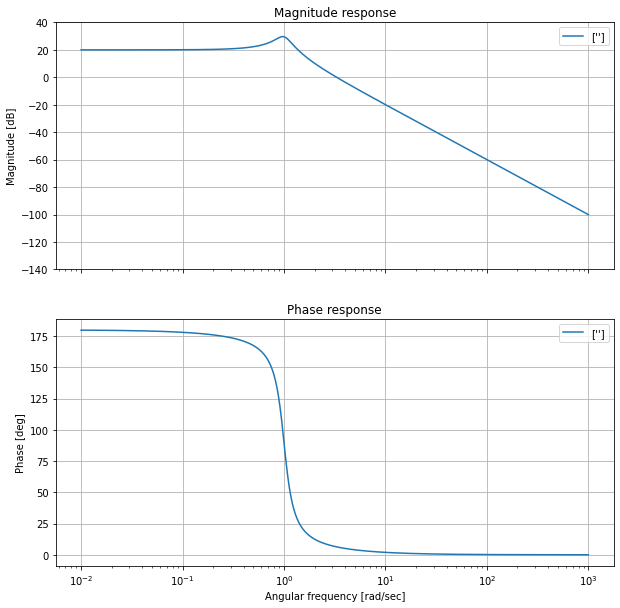

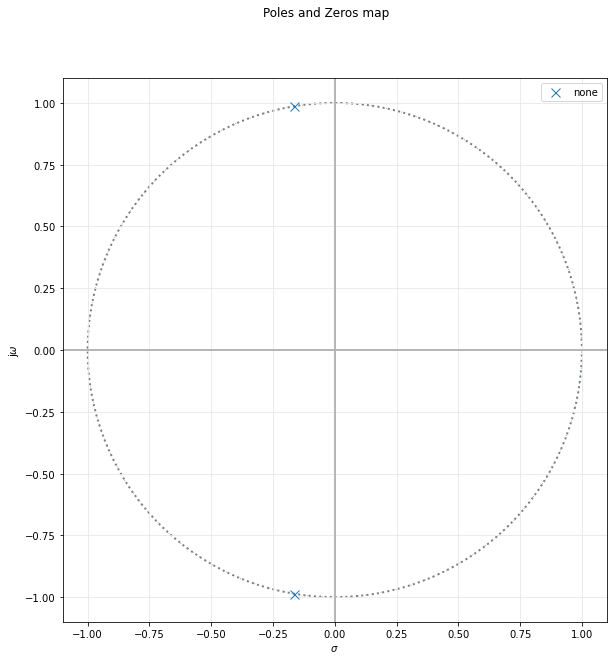

In [20]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Agrego funciones que voy a usar de splane
from splane import bodePlot, pzmap ,pretty_print_bicuad_omegayq

# Ajusto tamaño de graficos
mpl.rcParams['figure.figsize'] = (10,10)

# Defino valores de componentes
R1 = 1e3
R2 = 30e3
R3 = 10e3
C = 100e-6

# Defino componentes normalizados
R1_n = R1/R3
R2_n = R2/R3

# Defino numerador y denominador
num = np.array([-1/R1_n])
den = np.array([1,1/R2_n,1])

# Obtengo transferencia
T_s = sig.TransferFunction(num,den)

# Imprimo transferencia
pretty_print_bicuad_omegayq(num,den)

# Ploteo
plt.close('all')
bodePlot(T_s, [-2,3], [40,-140])

# Diagrama de polos y ceros
pzmap(T_s)


#### Verificamos en LTSpice:

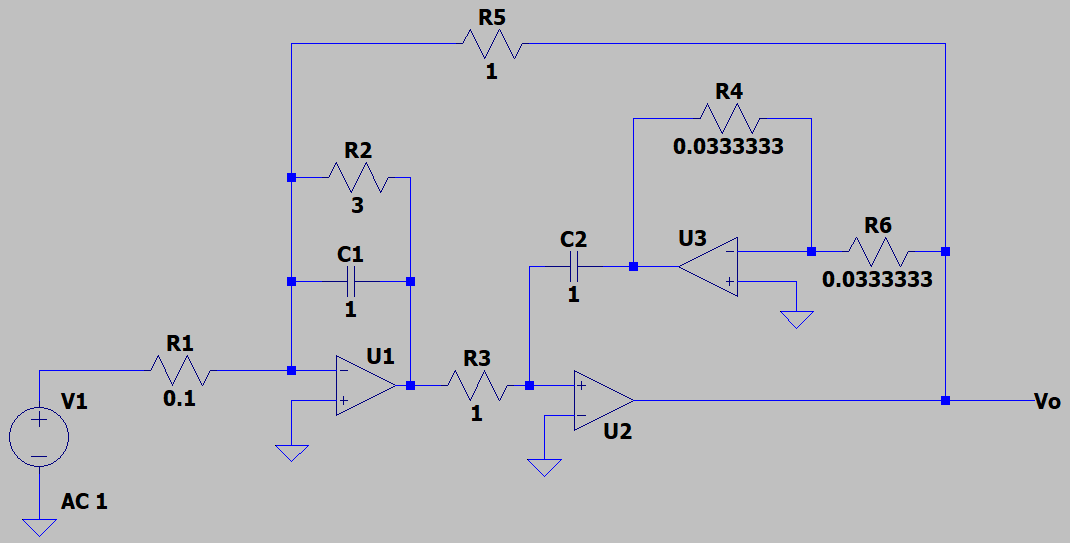

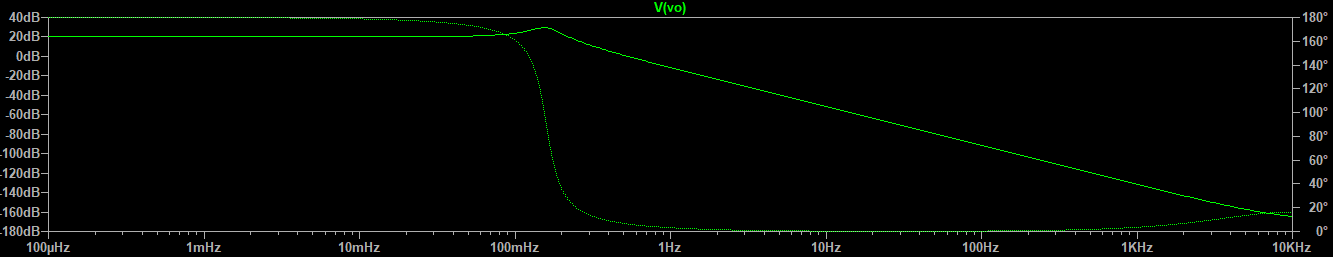

## FILTRO BUTTERWORTH

Para obtener un filtro pasa-banda, únicamente debemos modificar el valor de R2 a 7.071K (ver desarrollo analítico).

<IPython.core.display.Math object>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

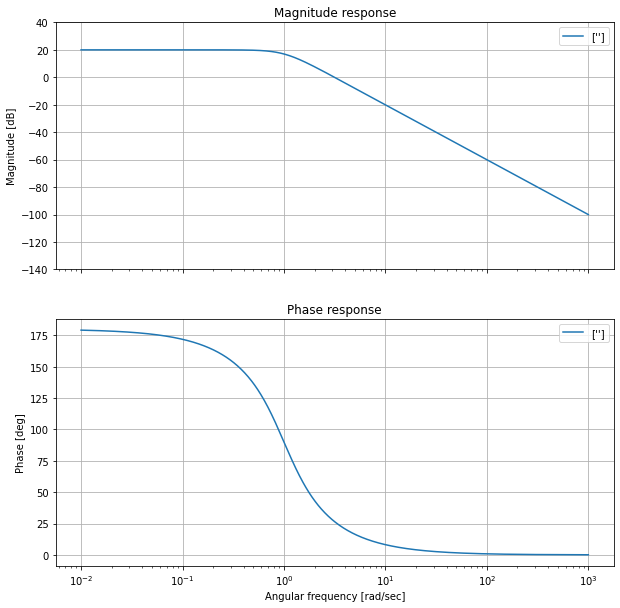

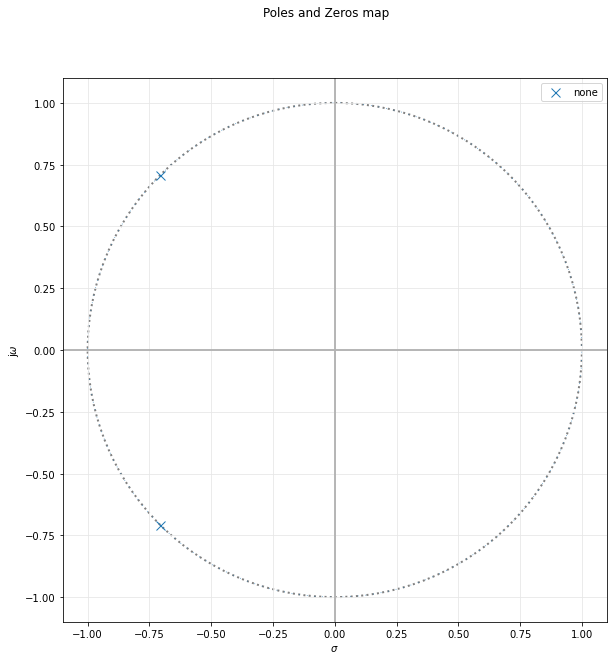

In [24]:
# Redefino R2 y R2'
R2 = 7.071e3
R2_n = R2/R3

# Defino numerador y denominador
num = np.array([-1/R1_n])
den = np.array([1,1/R2_n,1])

# Obtengo transferencia
T_s = sig.TransferFunction(num,den)

# Imprimo transferencia
pretty_print_bicuad_omegayq(num,den)

# Ploteo
plt.close('all')
bodePlot(T_s, [-2,3], [40,-140])

# Diagrama de polos y ceros
pzmap(T_s)

#### Verificamos en LTSpice:

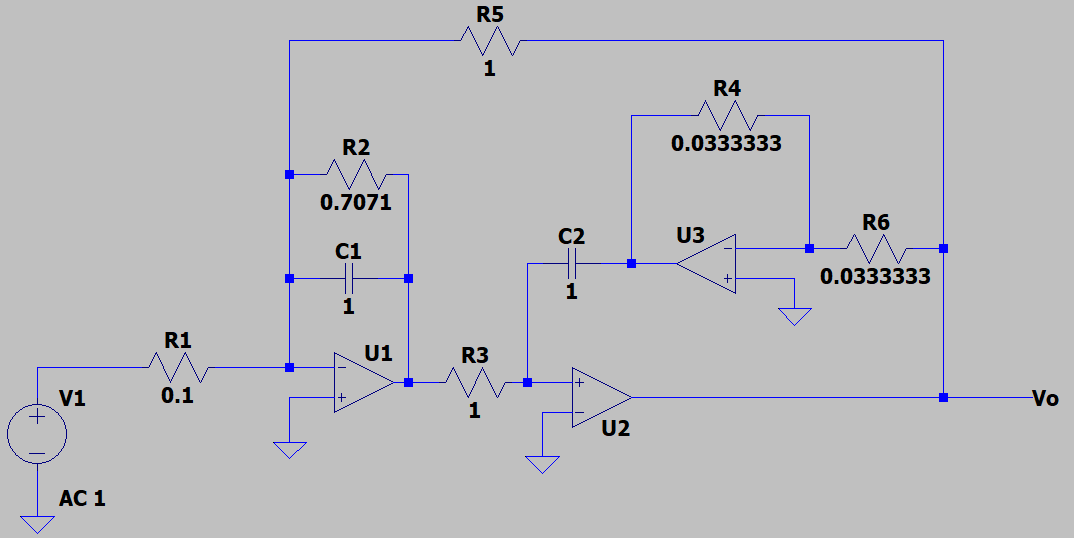

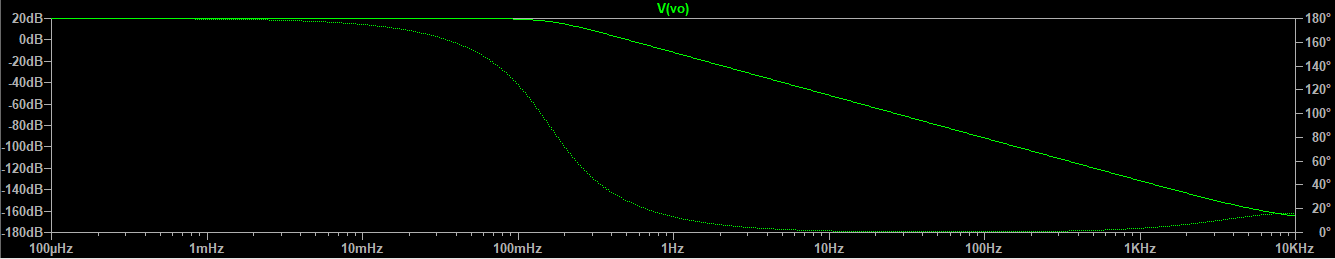

## FFILTRO PASA-BANDA

Para obtener un filtro pasabanda, tomamos la salida en la salida del primer opamp, obteniendo la siguiente función transferencia:

\begin{equation}
T(s) = - \frac{R2}{R1} . \frac{s.\frac{1}{C.R2}}{s^2 + s.\frac{1}{C.R2} + \frac{1}{C^2 R3^2}}
\end{equation}

<IPython.core.display.Math object>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

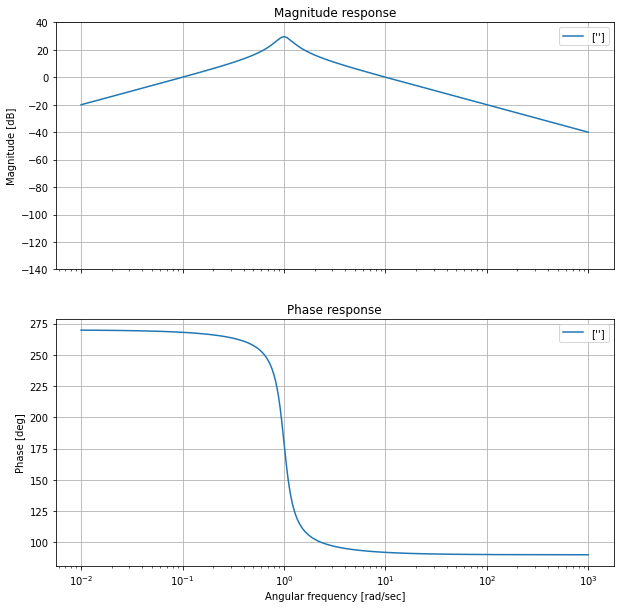

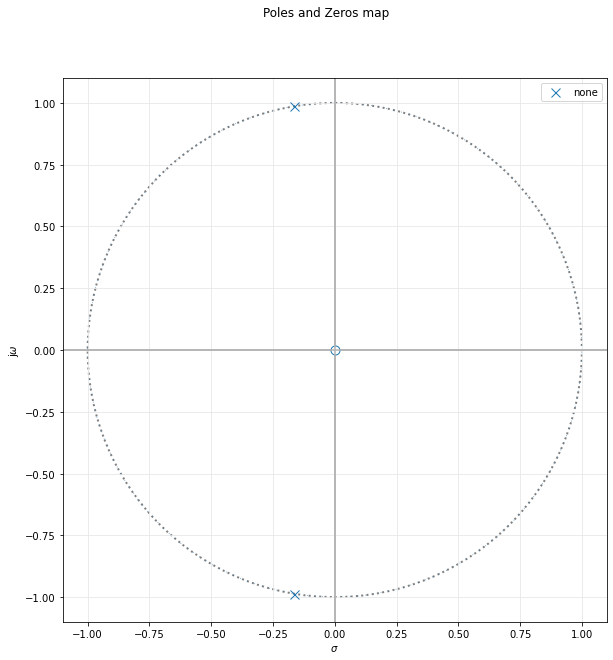

In [29]:
# Vuelvo R2 y R2' a su valor original
R2 = 30e3
R2_n = R2/R3

# Defino numerador y denominador
num = np.array([-1/(C*R1),0])
den = np.array([1,1/(C*R2),1/(C**2 * R3**2)])

# Obtengo transferencia
T_s = sig.TransferFunction(num,den)

# Imprimo transferencia
pretty_print_bicuad_omegayq(num,den)

# Ploteo
plt.close('all')
bodePlot(T_s, [-2,3], [40,-140])

# Diagrama de polos y ceros
pzmap(T_s)

#### Verificamos en LTSpice:

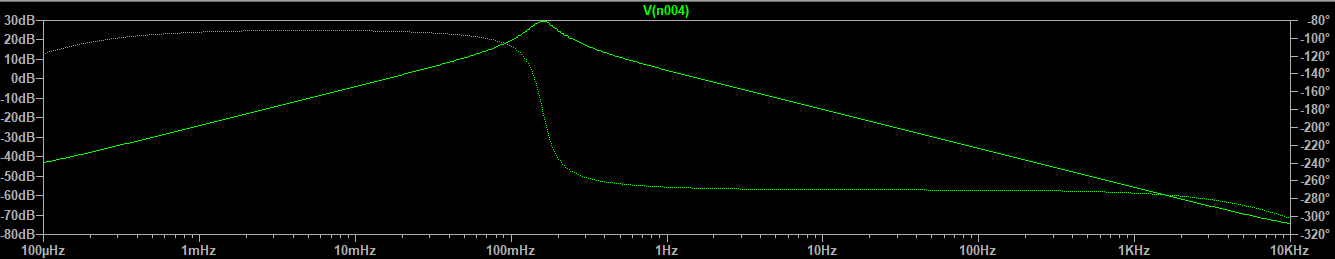